Import Libraries

In [37]:
import numpy as np

In [38]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

In [41]:
import statsmodels.api as sm

In [42]:
from scipy import stats

In [43]:
from datetime import datetime

In [158]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

In [159]:
from statsmodels.tsa.arima.model import ARIMA

In [137]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

In [154]:
from statsmodels.tsa.ar_model import AutoReg

In [161]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [264]:
from sklearn.metrics import mean_squared_error

Load Data

Load FAANG Stocks (Facebook, Apple, Amazon, Netflix, Google)

In [107]:
FB=pd.read_csv("FB.csv")

In [45]:
AMZN=pd.read_csv("AMZN.csv")

In [108]:
AAPL=pd.read_csv("AAPL.csv")

In [47]:
NFLX=pd.read_csv("NFLX.csv")

In [109]:
GOOG=pd.read_csv("GOOG.csv")

Load the BANG stocks (Blackberry, AMC, Nokia, GameStop)

In [49]:
BB=pd.read_csv("BB.csv")

In [110]:
AMC=pd.read_csv("AMC.csv")

In [51]:
NOK=pd.read_csv("NOK.csv")

In [52]:
GME=pd.read_csv("GME.csv")

Load Automotive Stocks (Tesla, BMW)

In [53]:
TSLA=pd.read_csv("TSLA.csv")

In [111]:
BMW=pd.read_csv("BMWYY.csv")

Exploratory Data Analysis

In [55]:
print(type(FB["Date"]))

<class 'pandas.core.series.Series'>


In [56]:
print(FB.head())

         Date  Adjusted Price    Open      Low    High    Volume
0  12/03/2018          141.09  143.00  140.760  143.68  24819.23
1  12/04/2018          137.93  140.73  137.160  143.39  30307.40
2  12/06/2018          139.63  133.82  133.670  139.70  28218.15
3  12/07/2018          137.42  139.25  136.657  140.87  21195.46
4  12/10/2018          141.85  139.60  139.010  143.05  26422.17


In [57]:
type(FB)

pandas.core.frame.DataFrame

In [58]:
FB.shape

(757, 6)

In [59]:
#fixing date format creating second dataset
fb=FB

In [60]:
fb['Date']=pd.to_datetime(fb["Date"])
   

In [36]:
print(fb.info)

<bound method DataFrame.info of           Date  Adjusted Price    Open      Low    High    Volume
0   2018-12-03          141.09  143.00  140.760  143.68  24819.23
1   2018-12-04          137.93  140.73  137.160  143.39  30307.40
2   2018-12-06          139.63  133.82  133.670  139.70  28218.15
3   2018-12-07          137.42  139.25  136.657  140.87  21195.46
4   2018-12-10          141.85  139.60  139.010  143.05  26422.17
..         ...             ...     ...      ...     ...       ...
752 2021-11-29          338.03  336.89  335.305  340.67  16650.95
753 2021-11-30          324.46  335.00  323.430  335.81  25390.01
754 2021-12-01          310.60  330.29  310.290  330.50  30384.08
755 2021-12-02          310.39  311.40  307.200  314.60  24396.17
756 2021-12-03          306.84  313.73  299.500  313.75  27471.01

[757 rows x 6 columns]>


In [63]:
amzn=AMZN
amzn['Date']=pd.to_datetime(amzn["Date"])

In [ ]:
aapl=AAPL
aapl['Date']=pd.to_datetime(aapl["Date"])

In [64]:
nflx=NFLX
nflx['Date']=pd.to_datetime(nflx["Date"])
goog=GOOG
goog['Date']=pd.to_datetime(goog["Date"])

In [65]:
# BANG Stocks
bb=BB
bb['Date']=pd.to_datetime(bb["Date"])
amc=AMC
amc['Date']=pd.to_datetime(amc["Date"])
nok=NOK
nok['Date']=pd.to_datetime(nok["Date"])
gme=GME
gme['Date']=pd.to_datetime(gme["Date"])

In [67]:
# Automotive Stocks
tsla=TSLA
tsla['Date']=pd.to_datetime(tsla["Date"])
bmw=BMW
bmw['Date']=pd.to_datetime(bmw["Date"])

In [68]:
print(tsla.head())

        Date  Adjusted Price    Open     Low    High    Volume
0 2018-12-03          71.698  72.000  70.400  73.200   8306.51
1 2018-12-04          71.940  71.210  70.400  73.736   8461.95
2 2018-12-06          72.612  71.202  70.152  73.476   7842.51
3 2018-12-07          71.592  73.800  71.530  75.898  11511.18
4 2018-12-10          73.030  72.000  70.624  73.196   6613.46


In [70]:
print(tsla['Adjusted Price'].head())

0    71.698
1    71.940
2    72.612
3    71.592
4    73.030
Name: Adjusted Price, dtype: float64


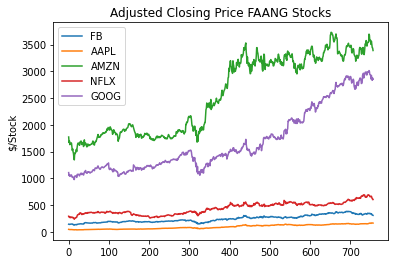

In [305]:
# Plot FAANG Stocks 
fb['Adjusted Price'].plot(label='FB', legend=True)
aapl['Adjusted Price'].plot(label='AAPL', legend=True)
amzn['Adjusted Price'].plot(label='AMZN', legend=True)
nflx['Adjusted Price'].plot(label='NFLX', legend=True)
goog['Adjusted Price'].plot(label='GOOG', legend=True)
plt.title("Adjusted Closing Price FAANG Stocks")
plt.ylabel("$/Stock")
plt.show()

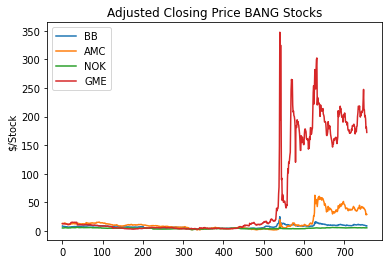

In [306]:
#Plot BANG Stocks
bb['Adjusted Price'].plot(label='BB', legend=True)
amc['Adjusted Price'].plot(label='AMC', legend=True)
nok['Adjusted Price'].plot(label='NOK', legend=True)
gme['Adjusted Price'].plot(label='GME', legend=True)
plt.title("Adjusted Closing Price BANG Stocks")
plt.ylabel("$/Stock")
plt.show()

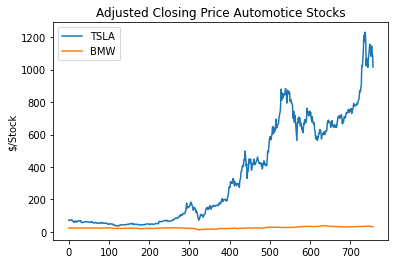

In [76]:
#Plot Automotive Stocks
tsla['Adjusted Price'].plot(label='TSLA', legend=True)
bmw['Adjusted Price'].plot(label='BMW', legend=True)
plt.title("Adjusted Closing Price Automotice Stocks")
plt.ylabel("$/Stock")
plt.show()


In [81]:
#Creating list of stocks
FAANG=[fb, aapl, amzn, nflx, goog]
BANG = [bb, amc, nok, gme]
AUTO=[tsla, bmw]

#Printing shape of each stock to determine # of rows to split training & test data
for faang in FAANG:
    print(faang.shape)

(757, 6)
(757, 6)
(757, 6)
(757, 6)
(757, 6)


In [82]:
for bang in BANG:
    print(bang.shape)

(757, 6)
(757, 6)
(757, 6)
(757, 6)


In [83]:
for auto in AUTO:
    print(auto.shape)

(757, 6)
(757, 6)


In [90]:
#Find first training date of 2021 to make testing data
print(tsla[tsla['Date']=='2021-01-04'])

          Date  Adjusted Price    Open      Low    High    Volume
524 2021-01-04          729.77  719.46  717.189  744.49  48638.19


In [91]:
#All dates in 2021
print(tsla['Date'][524:])

524   2021-01-04
525   2021-01-05
526   2021-01-06
527   2021-01-07
528   2021-01-08
         ...    
752   2021-11-29
753   2021-11-30
754   2021-12-01
755   2021-12-02
756   2021-12-03
Name: Date, Length: 233, dtype: datetime64[ns]


In [92]:
#Testing code for full dataset
print(tsla[524:])

          Date  Adjusted Price      Open       Low      High    Volume
524 2021-01-04          729.77   719.460   717.189   744.490  48638.19
525 2021-01-05          735.11   723.660   719.200   740.840  32245.17
526 2021-01-06          755.98   758.490   749.100   774.000  44699.97
527 2021-01-07          816.04   777.630   775.200   816.990  51498.95
528 2021-01-08          880.02   856.000   838.390   884.490  75055.53
..         ...             ...       ...       ...       ...       ...
752 2021-11-29         1136.99  1100.990  1100.190  1142.670  19464.47
753 2021-11-30         1144.76  1144.370  1118.000  1168.000  27092.04
754 2021-12-01         1095.00  1160.695  1090.760  1172.840  22934.70
755 2021-12-02         1084.60  1099.060  1056.650  1113.000  24371.62
756 2021-12-03         1014.97  1084.790  1000.210  1090.575  30774.00

[233 rows x 6 columns]


In [248]:
# Separating Training & Test Data
#With Datetime

# FAANG Stocks
fbtrain=fb.iloc[:524,1]
fbtest=fb.iloc[524:,1]
aapltrain=aapl.iloc[:524,1]
aapltest=aapl.iloc[524:,1]
amzntrain=amzn.iloc[:524,1]
amzntest=amzn.iloc[524:,1]
nflxtrain=nflx.iloc[:524,1]
nflxtest=nflx.iloc[524:,1]
googtrain=goog.iloc[:524,1]
googtest=goog.iloc[524:,1]

# BANG Stocks
bbtrain=bb.iloc[:524,1]
bbtest=bb.iloc[524:,1]
amctrain=amc.iloc[:524,1]
amctest=amc.iloc[524:,1]
noktrain=nok.iloc[:524, 1]
noktest=nok.iloc[524:,1]
gmetrain=gme.iloc[:524,1]
gmetest=gme.iloc[524:,1]

# Automotive Stocks
tslatrain=tsla.iloc[:524,1]
tslatest=tsla.iloc[524:,1]
bmwtrain=bmw.iloc[:524,1]
bmwtest=bmw.iloc[524:,1]

# Separating Training & Test Data
#Without Changing Datetime

# FAANG Stocks
#changed FBtrain & TEST
FBtrain=FB.iloc[:524,1]
FBtest=FB.iloc[524:,1]
AAPLtrain=AAPL.iloc[524:,:2]
AAPLltest=AAPL.iloc[:524,:2]
AMZNtrain=AMZN.iloc[524:,:2]
AMZNtest=AMZN.iloc[:524,:2]
NFLXtrain=NFLX.iloc[524:,:2]
NFLXtest=NFLX.iloc[524:,:2]
GOOGtrain=GOOG.iloc[:524,:2]
GOOGtest=GOOG.iloc[524:,:2]

# BANG Stocks
BBtrain=BB.iloc[:524,:2]
BBtest=BB.iloc[524:,:2]
AMCtrain=AMC.iloc[:524,:2]
AMCtest=AMC.iloc[524:,:2]
NOKtrain=NOK.iloc[:524,:2]
NOKtest=NOK.iloc[524:,:2]
GMEtrain=GME.iloc[:524,:2]
GMEtest=GME.iloc[524:,:2]

# Automotive Stocks
TSLAtrain=TSLA.iloc[:524,:2]
TSLAtest=TSLA.iloc[524:,:2]
BMWtrain=BMW.iloc[:524,:2]
BMWtest=BMW.iloc[524:,:2]

Estimating an AR Model

In [239]:
print(fbtrain.index)

RangeIndex(start=0, stop=524, step=1)


FAANG Stock Models

In [240]:
fbtrain.shape

(524,)

In [241]:
fbtest.shape

(233,)

In [242]:
mdlfb=ARIMA(fbtrain, order=(1,0,0))

In [243]:
resultfb=mdlfb.fit()

No handles with labels found to put in legend.


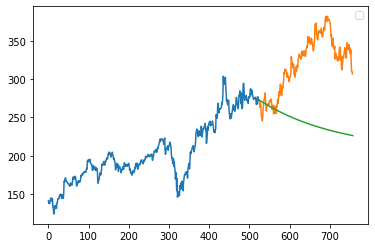

In [309]:
plt.plot(fbtrain)
plt.plot(fbtest)
plt.plot(resultfb.predict(start=525, end=757))
plt.legend()
plt.show()

In [249]:
aapltrain.shape

(524,)

C:\Users\enory\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
No handles with labels found to put in legend.


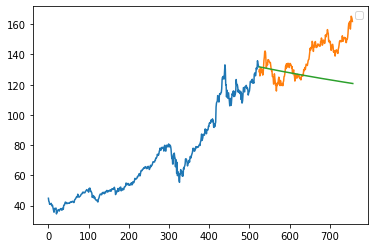

In [276]:
mdlaapl=ARIMA(aapltrain, order=(1,0,0))
resultaapl=mdlaapl.fit()
plt.plot(aapltrain)
plt.plot(aapltest)
plt.plot(resultaapl.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


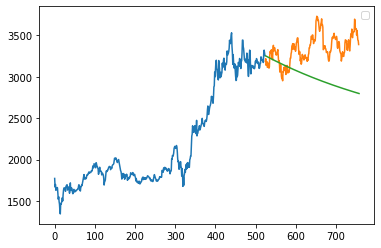

In [277]:
mdlamzn=ARIMA(amzntrain, order=(1,0,0))
resultamzn=mdlamzn.fit()
plt.plot(amzntrain)
plt.plot(amzntest)
plt.plot(resultamzn.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


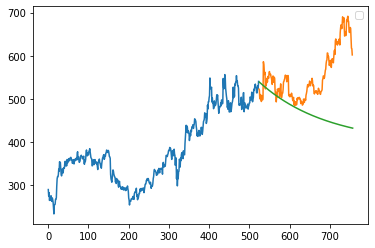

In [278]:
mdlnflx=ARIMA(nflxtrain, order=(1,0,0))
resultnflx=mdlnflx.fit()
plt.plot(nflxtrain)
plt.plot(nflxtest)
plt.plot(resultnflx.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


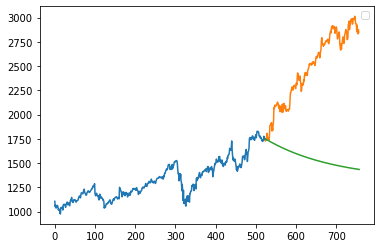

In [279]:
mdlgoog=ARIMA(googtrain, order=(1,0,0))
resultgoog=mdlgoog.fit()
plt.plot(googtrain)
plt.plot(googtest)
plt.plot(resultgoog.predict(start=525, end=757))
plt.legend()
plt.show()

BANG Stock Models

No handles with labels found to put in legend.


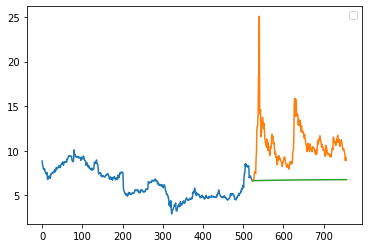

In [280]:
mdlbb=ARIMA(bbtrain, order=(1,0,0))
resultbb=mdlbb.fit()
plt.plot(bbtrain)
plt.plot(bbtest)
plt.plot(resultbb.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


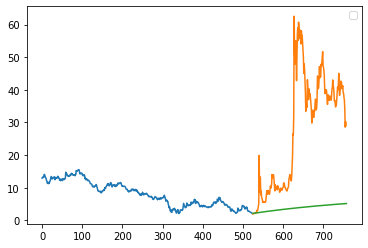

In [281]:
mdlamc=ARIMA(amctrain, order=(1,0,0))
resultamc=mdlamc.fit()
plt.plot(amctrain)
plt.plot(amctest)
plt.plot(resultamc.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


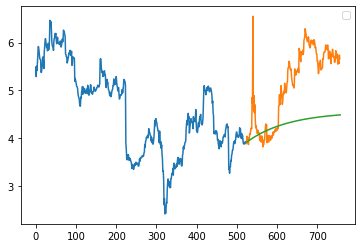

In [282]:
mdlnok=ARIMA(noktrain, order=(1,0,0))
resultnok=mdlnok.fit()
plt.plot(noktrain)
plt.plot(noktest)
plt.plot(resultnok.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


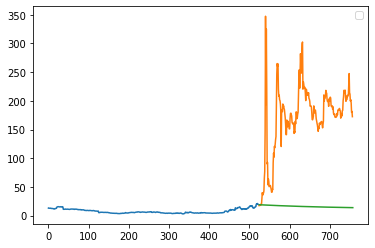

In [283]:
mdlgme=ARIMA(gmetrain, order=(1,0,0))
resultgme=mdlgme.fit()
plt.plot(gmetrain)
plt.plot(gmetest)
plt.plot(resultgme.predict(start=525, end=757))
plt.legend()
plt.show()

Automotive Stock Models

C:\Users\enory\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
No handles with labels found to put in legend.


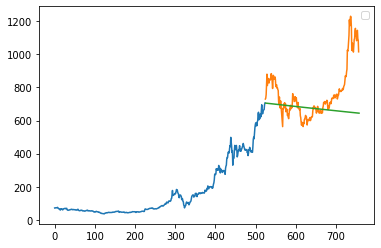

In [284]:
mdltsla=ARIMA(tslatrain, order=(1,0,0))
resulttsla=mdltsla.fit()
plt.plot(tslatrain)
plt.plot(tslatest)
plt.plot(resulttsla.predict(start=525, end=757))
plt.legend()
plt.show()

No handles with labels found to put in legend.


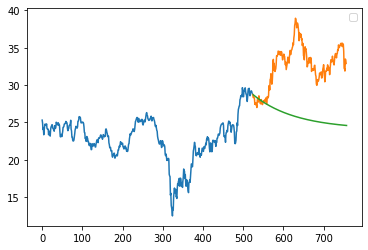

In [307]:
mdlbmw=ARIMA(bmwtrain, order=(1,0,0))
resultbmw=mdlbmw.fit()
plt.plot(bmwtrain)
plt.plot(bmwtest)
plt.plot(resultbmw.predict(start=525, end=757))
plt.legend()
plt.show()

Compute Mean Squared Error for Each Group's Stocks

FAANG Stocks

In [286]:
print(resultfb.predict(start=525, end=757))

525    272.480989
526    272.144047
527    271.808802
528    271.475246
529    271.143370
          ...    
753    226.741771
754    226.635235
755    226.529236
756    226.423770
757    226.318835
Name: predicted_mean, Length: 233, dtype: float64


In [287]:
type(resultfb.predict(start=525, end=757))

pandas.core.series.Series

In [288]:
print(fbtest.shape)

(233,)


In [290]:
fbrsme=mean_squared_error(fbtest.to_list(), resultfb.predict(start=525, end=757).to_list())
aaplrsme=mean_squared_error(aapltest.to_list(), resultaapl.predict(start=525, end=757).to_list())
amznrsme=mean_squared_error(amzntest.to_list(), resultamzn.predict(start=525, end=757).to_list())
nflxrsme=mean_squared_error(nflxtest.to_list(), resultnflx.predict(start=525, end=757).to_list())
googrsme=mean_squared_error(googtest.to_list(), resultgoog.predict(start=525, end=757).to_list())

In [296]:
FAANG_RSME=[fbrsme, aaplrsme, amznrsme, nflxrsme, googrsme]
FAANG_Rsme=['Facebook RSME: ', 'Apple RSME: ', 'Amazon RSME: ', 'Netflix RSME: ', 'Google RSME: ']

for j in range(5):
    print(FAANG_Rsme[j], FAANG_RSME[j])


Facebook RSME:  7897.864408204143
Apple RSME:  337.00961769881684
Amazon RSME:  180984.39870148196
Netflix RSME:  12499.7036810266
Google RSME:  1047892.9943483267


BANG Stocks

In [303]:
bbrsme=mean_squared_error(bbtest.to_list(), resultbb.predict(start=525, end=757).to_list())
amcrsme=mean_squared_error(amctest.to_list(), resultamc.predict(start=525, end=757).to_list())
nokrsme=mean_squared_error(noktest.to_list(), resultnok.predict(start=525, end=757).to_list())
gmersme=mean_squared_error(gmetest.to_list(), resultgme.predict(start=525, end=757).to_list())

In [304]:
BANG_RSME=[bbrsme, amcrsme, nokrsme, gmersme]
BANG_Rsme=['Blackberry RSME: ', 'AMC RSME: ', 'Nokia RSME: ', 'GameStop RSME: ']

for j in range(4):
    print(BANG_Rsme[j], BANG_RSME[j])

Blackberry RSME:  19.912927290848128
AMC RSME:  847.403445020283
Nokia RSME:  1.0432017324114453
GameStop RSME:  27704.529348573844


Automotive Stocks

In [300]:
tslarsme=mean_squared_error(tslatest.to_list(), resulttsla.predict(start=525, end=757).to_list())
bmwrsme=mean_squared_error(bmwtest.to_list(), resultbmw.predict(start=525, end=757).to_list())

In [302]:
AUTO_RSME=[tslarsme, bmwrsme]
AUTO_Rsme=['Tesla RSME: ', 'BMW RSME: ']

for j in range(2):
    print(AUTO_Rsme[j], AUTO_RSME[j])

Tesla RSME:  33227.29248190329
BMW RSME:  56.59979097460029
